In [242]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Twitter API Keys
consumer_key = "vnn94VlkLW6ftf3umIyqvdkDc"
consumer_secret = "0h6CnRFCa43h9yrXbe1zAB6vE9PVIRP1D6NO4lRweIBZNwCRay"
access_token = "942946411133337600-TqcZS5K3pX1gznvkFFDKaotuEdhuafO"
access_token_secret = "E3qQ5VBTuUc1uNmokmzm4CoUypjpRnCWp4RWTdVq2zUTs"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
users=("@BBC", "@CNN","@CBS", "@FoxNews","@nytimes")
tweet_times = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_text =[]
user_list =[]
tweet_time_objects = []
time_in_between = []
for user in users:
    public_tweets = api.user_timeline(user, count=100)
    #compound_list = []
    #positive_list = []
    #negative_list = []
    #neutral_list = []
    #tweet_times = []
    #tweet_text =[]
    for tweet in public_tweets:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text.append(tweet["text"])
        tweet_times.append(tweet["created_at"])
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        user_list.append(user)
    # Convert all tweet times into datetime objects
#tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

        # Calculate the time between tweets
  
    # Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) 
    time_in_between.append(secs_apart)

    # Preview that datetimes are matching
#print(len(compound_list))
print(range(len(time_in_between)))
sentiments= pd.DataFrame({"Date":tweet_times ,"Compound": compound_list,"Positive": positive_list,"Negative": negative_list,
                          "Neutral": neutral_list,"Tweet_text":tweet_text, "News Station": user_list})
sentiments.head()

range(0, 499)


,Compound,Date,Negative,Neutral,News Station,Positive,Tweet_text
0,0.3802,Tue Jan 09 20:12:54 +0000 2018,0.000,0.895,@BBC,0.105,RT @BBCBreakfast: Make sure you 'paws' for thi...
1,0.3182,Tue Jan 09 20:10:56 +0000 2018,0.000,0.887,@BBC,0.113,RT @1Xtra: So @iamwill and @bep are putting ou...
2,0.0000,Tue Jan 09 20:10:12 +0000 2018,0.000,1.000,@BBC,0.000,RT @BBCiPlayer: Class Series 1 - watch all epi...
3,0.8316,Tue Jan 09 20:10:00 +0000 2018,0.071,0.586,@BBC,0.343,"RT @bbcthree: ""As long as I'm alive, I feel th..."
4,0.0772,Tue Jan 09 19:55:09 +0000 2018,0.000,0.929,@BBC,0.071,A documentary series looking at the challenges...


In [243]:
sentiments.to_csv("sentiments.csv", index=False, header=True)

In [244]:
sentiments_df= (sentiments.loc[sentiments["News Station"] == "@BBC"])["Compound"]
sentiments_df.head()

0    0.3802
1    0.3182
2    0.0000
3    0.8316
4    0.0772
Name: Compound, dtype: float64

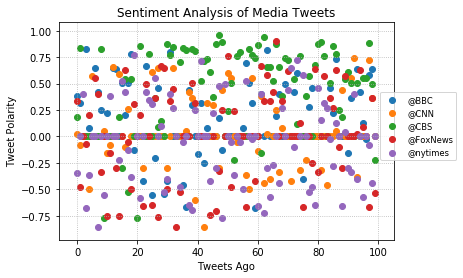

In [245]:
news_station =["@BBC", "@CNN","@CBS", "@FoxNews","@nytimes"]
for news in news_station:
    plt.scatter(x = range(len((sentiments.loc[sentiments["News Station"] == news])["Compound"])), 
                y=  (sentiments.loc[sentiments["News Station"] == news])["Compound"])
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(("@BBC", "@CNN","@CBS", "@FoxNews","@nytimes"), bbox_to_anchor=(1.2, 0.7), fontsize="small", 
           fancybox=True)
                                                                   
plt.grid(True, linestyle='dotted')
#plt.savefig("sentiment.png")
plt.show()


[0.14299999999999999, 0.036999999999999998, 0.39100000000000001, 0.025999999999999999, -0.048000000000000001]


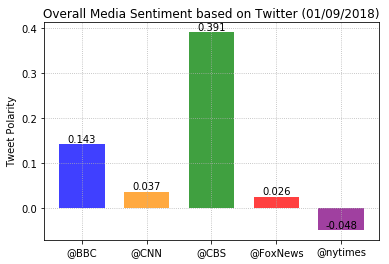

In [246]:

news_station =["@BBC", "@CNN","@CBS", "@FoxNews","@nytimes"]
x=np.arange(len(news_station))
y_list=[]
for new in news_station:
    y=(np.mean(sentiments.loc[sentiments["News Station"] == new])["Compound"])
    y1=np.around(y, decimals=3)#round out the Compound values to 3 decimal places
    y_list.append(y1)

print(y_list)
colors =['b','darkorange','g','r', 'purple']
plt.bar(x, y_list,alpha=0.75, tick_label=news_station,align="center", width=0.7, 
        color=colors)
#Title with Date
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y"))) 
plt.ylabel("Tweet Polarity")
plt.grid(True, linestyle='dotted')
#numbers above each bar
for a,b in zip(x, y_list):
    plt.text(a, b, str(b),ha='center', va='bottom')
plt.savefig("Average sentiment.png")
plt.show()
